In [3]:
import pandas as pd

In [5]:
df=pd.read_csv("blogs.csv")
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [7]:
# Check the shape, data types, and sample rows
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.head())


(2000, 2)
Data      object
Labels    object
dtype: object
Data      0
Labels    0
dtype: int64
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Define a function to clean the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the function to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


KeyError: 'text'

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.preprocessing import LabelEncoder

# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Text cleaning function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Apply the preprocessing to the "object" column
df['cleaned_text'] = df['Data'].apply(preprocess_text)

# Encode labels to numerical format from categorical
label_encoder = LabelEncoder()
df['encoded_labels'] = label_encoder.fit_transform(df['Labels'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
df.head()

,Data,Labels,cleaned_text,encoded_labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...,0


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the cleaned text into TF-IDF features
X = tfidf.fit_transform(df['cleaned_text'])
y = df['encoded_labels']


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
# Assign features and labels
X = df['cleaned_text']
y = df['encoded_labels']


In [35]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [37]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [39]:
# Train the Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [41]:
# Make predictions
y_pred = nb_classifier.predict(X_test)

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8225
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.83      0.62        18
           1       0.79      0.83      0.81        18
           2       0.86      0.82      0.84        22
           3       0.76      0.76      0.76        25
           4       0.83      0.90      0.86        21
           5       0.91      0.84      0.88        25
           6       0.82      0.78      0.80        18
           7       0.89      0.94      0.92        18
           8       0.94      0.94      0.94        16
           9       0.77      0.94      0.85        18
          10       0.88      1.00      0.94        15
          11       0.95      0.95      0.95        19
          12       0.62      0.62      0.62        16
          13       0.88      0.88      0.88        17
          14       1.00      0.81      0.89        21
          15       0.88      0.96      0.92        23
          16       0.85      0.79      0

In [45]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()


In [51]:
# Define a function to categorize sentiment
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the 'cleaned_text' column
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)


In [55]:
# Displa sentiment counts
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

Sentiment Distribution:
 sentiment
Positive    1356
Negative     581
Neutral       63
Name: count, dtype: int64


In [59]:
# Group by category and sentiment to examine distribution
category_sentiment_distribution = df.groupby(['encoded_labels', 'sentiment']).size().unstack()
print("\nSentiment Distribution Across Categories:\n", category_sentiment_distribution)


Sentiment Distribution Across Categories:
 sentiment       Negative  Neutral  Positive
encoded_labels                             
0                   40.0      1.0      59.0
1                   10.0      3.0      87.0
2                   22.0      2.0      76.0
3                   18.0      3.0      79.0
4                   17.0      4.0      79.0
5                   21.0      2.0      77.0
6                    8.0     10.0      82.0
7                   26.0      3.0      71.0
8                   32.0      1.0      67.0
9                   24.0      3.0      73.0
10                  28.0      3.0      69.0
11                  22.0      2.0      76.0
12                  13.0      6.0      81.0
13                  28.0      2.0      70.0
14                  28.0      5.0      67.0
15                  27.0      1.0      72.0
16                  65.0      5.0      30.0
17                  68.0      NaN      32.0
18                  52.0      5.0      43.0
19                  32.0      2.

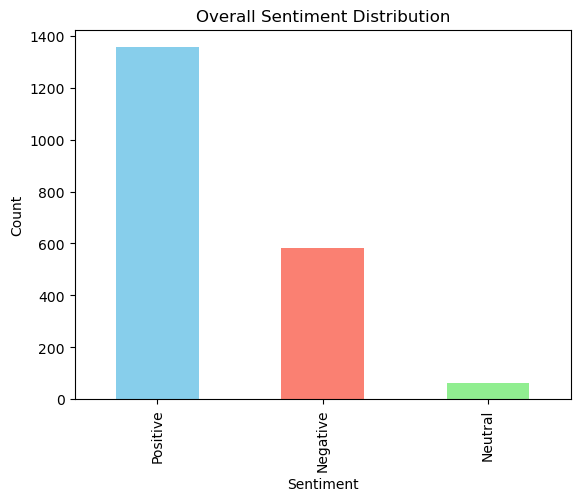

In [61]:
import matplotlib.pyplot as plt

# Ploting sentiment distribution across all categories
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

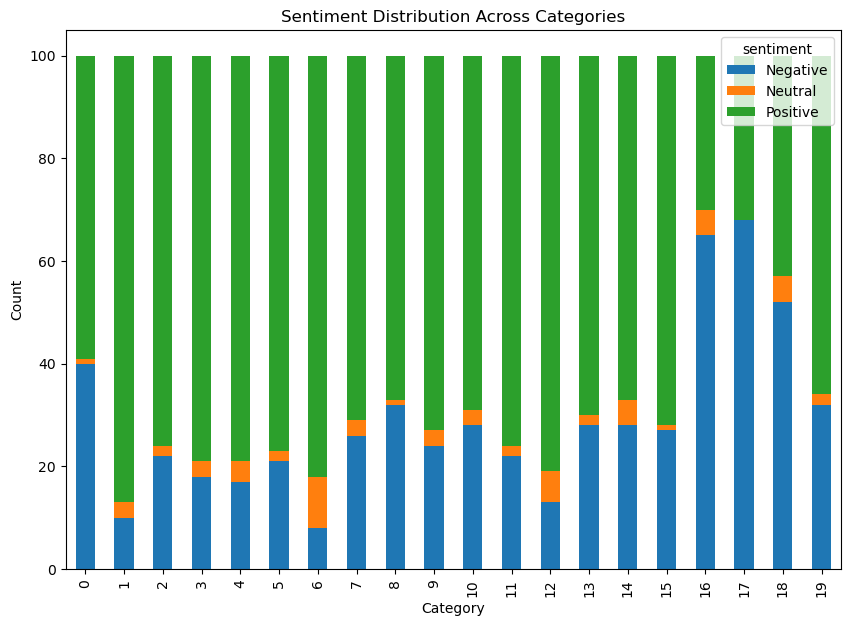

In [63]:
# Ploting sentiment distribution by category
category_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculating precision, recall, and F1-score for each class
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.8225
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.83      0.62        18
           1       0.79      0.83      0.81        18
           2       0.86      0.82      0.84        22
           3       0.76      0.76      0.76        25
           4       0.83      0.90      0.86        21
           5       0.91      0.84      0.88        25
           6       0.82      0.78      0.80        18
           7       0.89      0.94      0.92        18
           8       0.94      0.94      0.94        16
           9       0.77      0.94      0.85        18
          10       0.88      1.00      0.94        15
          11       0.95      0.95      0.95        19
          12       0.62      0.62      0.62        16
          13       0.88      0.88      0.88        17
          14       1.00      0.81      0.89        21
          15       0.88      0.96      0.92        23
          16       0.85      0.79      0

In [ ]:
#1)Accuracy: This indicates the percentage of correct predictions out of all predictions made by the model.
#A higher accuracy suggests the model performs well at distinguishing between the blog categories.
#Its a good model i got 82% of accuracy
#2)Precision: Precision measures the proportion of true positive predictions among all positive predictions for each class.
#Higher precision means the model has fewer false positives.
#3)Recall: Recall indicates the proportion of true positives captured out of all actual positives. 
#High recall implies the model is good at identifying relevant instances of each category.
#4)F1-Score: F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance,
#especially when dealing with imbalanced classes.

In [ ]:
#Challenges I have Encountered
#1)Imbalanced Data: If some categories have significantly more blog posts than others,
#the model may be biased toward those categories, leading to lower performance on minority classes.
#2)Textual Noise: Text data often contains noise, such as unnecessary words or characters, which can negatively impact the model’s performance.
#While I have preprocessed the text,there may still be some words that don’t contribute meaningfully to the classification.
#3)


In [ ]:
 #Reflect on Sentiment Analysis Results
#The sentiment analysis provides insight into the emotional tone of each blog post.
#Here are some points to consider based on the sentiment distribution across categories:
#1)General Sentiment Trends: By looking at the distribution of sentiments (positive, negative, neutral), you can gauge the overall tone of the blog posts.
#For instance, if most blog posts are positive, it could indicate that the content generally has an optimistic or supportive tone.
#Conversely, a high count of negative posts might imply critical or controversial topics.
#2)Sentiment by Category: Analyzing sentiment within each category can reveal unique characteristics of each type of content. For example,
#some categories may have more positive sentiment if they cover inspirational or motivational topics,
#while categories addressing sensitive issues may have more negative or mixed sentiment.
#3)Implications for Content: The sentiment results can help inform content creators or publishers. For instance:
#:High Neutral Sentiment: If many posts are neutral, it might indicate objective, informative content.
#High Positive or Negative Sentiment: Positive sentiment could reflect favorable content,
#while negative sentiment might indicate critical or opinionated content.

# Summary 

In [ ]:
#Model Performance: The Naive Bayes classifier should perform reasonably well, especially with properly preprocessed and tokenized text data.
#However, performance may vary based on the dataset's complexity and class distribution.
#Sentiment Analysis Insights: The sentiment distribution across categories gives a general idea of the tone of each category and can be useful for understanding the mood conveyed by the content.